In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
%matplotlib inline
C = 299792.458

In [2]:
fname = 'dat_gals.csv'
df = pd.read_csv(fname)
df['LOG(vel)'] = C*df['z']
df.head()

,ID,z,scan,D25/2,d,B-mag,err_B,B-V,Morph,t_morph,err_t,bri25,survey,key,LOG(vel)
0,UGC1736,0.005210,6597.0,144.0,21.00,11.62,0.18,0.68,SABc,5.1,0.6,22.91,GHASP,all,1561.918706
1,UGC5840,0.001935,6575.5,225.0,6.91,10.50,0.09,0.68,Sbc,4.0,0.3,23.33,GHASP,UGC5840,580.098406
2,UGC8937,0.009877,6627.6,69.0,4.96,12.78,0.36,NaN,SBb,3.1,0.4,22.92,GHASP,all,2961.050108
3,UGC11283,0.006508,6605.5,69.0,32.60,13.61,0.06,0.60,Sd,7.9,0.8,22.84,GHASP,all,1951.049317
4,UGC3685,0.005994,6602.1,120.0,28.10,13.00,0.33,NaN,Sb,3.0,0.4,22.76,GHASP,all,1796.955993


In [3]:
from scipy.stats import pearsonr
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top right hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    # rho = '\u03C1'
    ax.annotate(f'{r:.1f}', xy=(.85, .9), xycoords=ax.transAxes, fontsize=14)

In [4]:
grid = sns.PairGrid(data=df, vars=['scan', 'D25/2', 'd', 'B-mag', 't_morph', 'bri25'], dropna=True)
grid = grid.map_upper(sns.regplot, color='black')
grid = grid.map_upper(corrfunc)
grid = grid.map_lower(sns.kdeplot, cmap='binary')
grid = grid.map_diag(sns.distplot, kde=False, rug=True, color='black')
plt.tight_layout()
plt.savefig('test.png', dpi=200)

Error in callback <function flush_figures at 0x7f43e472cc80> (for post_execute):


KeyboardInterrupt: 

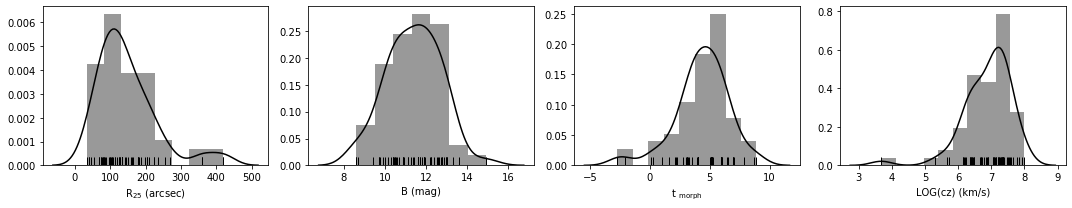

In [5]:
plt.rcParams['figure.figsize'] = 15,3
RUG = True
plt.subplot(141)
p1 = sns.distplot(df['D25/2'], rug=RUG, color='black')
plt.subplot(142)
p2 = sns.distplot(df['B-mag'], rug=RUG, color='black')
plt.subplot(143)
p3 = sns.distplot(df['t_morph'], rug=RUG, color='black')
plt.subplot(144)
p4 = sns.distplot(np.log(df['LOG(vel)']), rug=RUG, color='black')
p1.set_xlabel(r'R$_{25}$ (arcsec)')
p2.set_xlabel(r'B (mag)')
p3.set_xlabel(r't $_\mathrm{morph}$')
p4.set_xlabel('LOG(cz) (km/s)')
plt.tight_layout()

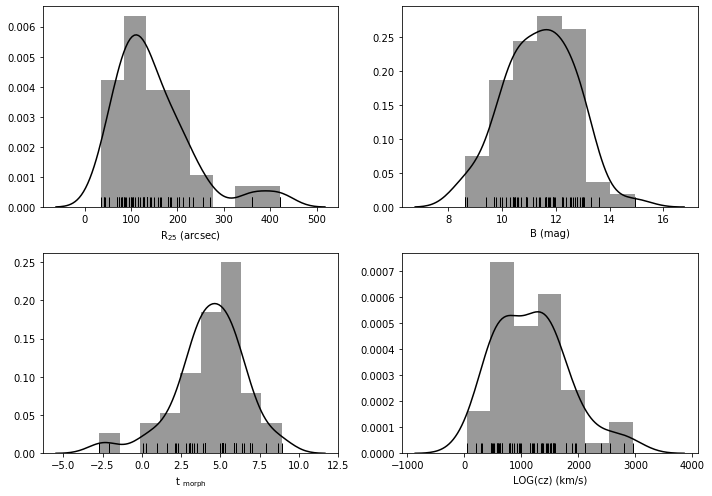

In [7]:
plt.rcParams['figure.figsize'] = 10,7
RUG = True
plt.subplot(221)
p1 = sns.distplot(df['D25/2'], rug=RUG, color='black')
plt.subplot(222)
p2 = sns.distplot(df['B-mag'], rug=RUG, color='black')
plt.subplot(223)
p3 = sns.distplot(df['t_morph'], rug=RUG, color='black')
plt.subplot(224)
p4 = sns.distplot(df['LOG(vel)'], rug=RUG, color='black')
p1.set_xlabel(r'R$_{25}$ (arcsec)')
p2.set_xlabel(r'B (mag)')
p3.set_xlabel(r't $_\mathrm{morph}$')
p4.set_xlabel('LOG(cz) (km/s)')
plt.tight_layout()

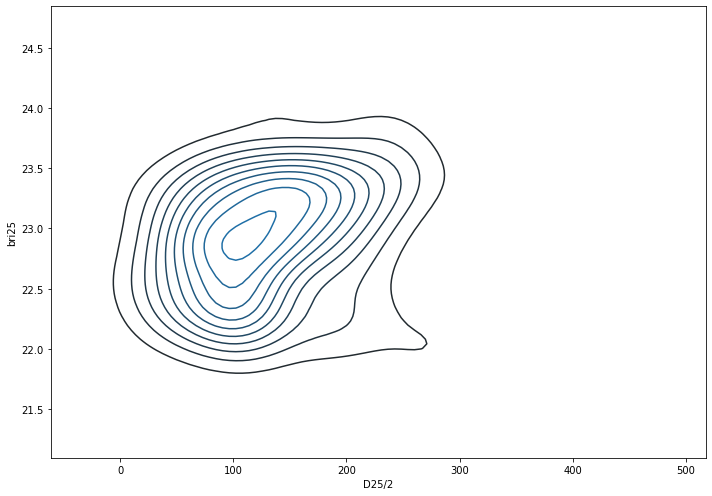

In [11]:
sns.kdeplot(df['D25/2'], df['bri25'])
plt.tight_layout()

In [6]:
fname = 'gals_final.csv'
df = pd.read_csv(fname)
df['LOG(vel)'] = np.log10(C*df['z'])
df

,ID,z,scan,D25/2,d,B-mag,err_B,B-V,Morph,t_morph,err_t,bri25,LOG(vel)
0,UGC1736,0.005210,6597.0,144.0,21.00,11.62,0.18,0.68,SABc,5.1,0.6,22.91,3.193658
1,UGC5840,0.001935,6575.5,225.0,6.91,10.50,0.09,0.68,Sbc,4.0,0.3,23.33,2.763502
2,UGC8937,0.009877,6627.6,69.0,4.96,12.78,0.36,NaN,SBb,3.1,0.4,22.92,3.471446
3,UGC3685,0.005994,6602.1,120.0,28.10,13.00,0.33,NaN,Sb,3.0,0.4,22.76,3.254537
4,UGC9363,0.005260,6597.3,105.0,27.60,12.26,0.09,0.65,Scd,6.9,0.4,22.25,3.197806
5,UGC10470,0.004543,6592.6,108.0,24.20,11.89,0.12,0.64,Sbc,4.0,0.2,22.12,3.134163
6,UGC4820,0.004503,6592.4,150.0,21.30,11.14,0.10,0.96,Sab,1.6,0.6,22.88,3.130323
7,UGC6118,0.005087,6596.2,75.0,27.70,11.62,0.13,0.67,Sab,2.1,0.4,22.27,3.183282
8,UGC8490,0.000670,6567.2,159.0,5.52,11.73,0.05,0.47,Sm,8.9,0.4,23.32,2.302896
9,UGC9179,0.000977,6569.2,183.0,7.61,11.39,0.13,0.52,SABc,6.9,0.5,22.86,2.466715


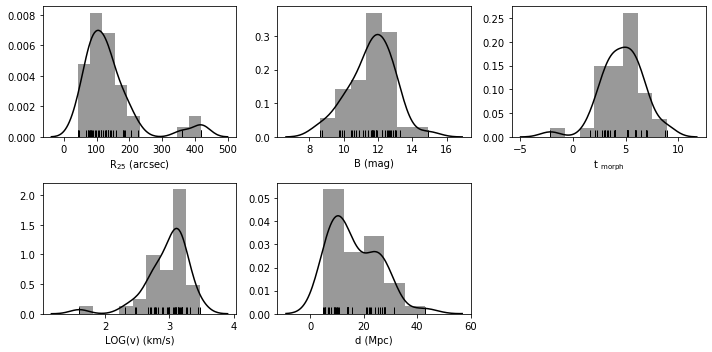

In [7]:
plt.rcParams['figure.figsize'] = 10,5
RUG = True
plt.subplot(231)
p1 = sns.distplot(df['D25/2'], rug=RUG, color='black')
plt.subplot(232)
p2 = sns.distplot(df['B-mag'], rug=RUG, color='black')
plt.subplot(233)
p3 = sns.distplot(df['t_morph'], rug=RUG, color='black')
plt.subplot(234)
p4 = sns.distplot(df['LOG(vel)'], rug=RUG, color='black')
plt.subplot(235)
p5 = sns.distplot(df['d'], rug=RUG, color='black')
p1.set_xlabel(r'R$_{25}$ (arcsec)')
p2.set_xlabel(r'B (mag)')
p3.set_xlabel(r't $_\mathrm{morph}$')
p4.set_xlabel('LOG(v) (km/s)')
p5.set_xlabel('d (Mpc)')
plt.tight_layout()
plt.savefig('hists.png', dpi=200)

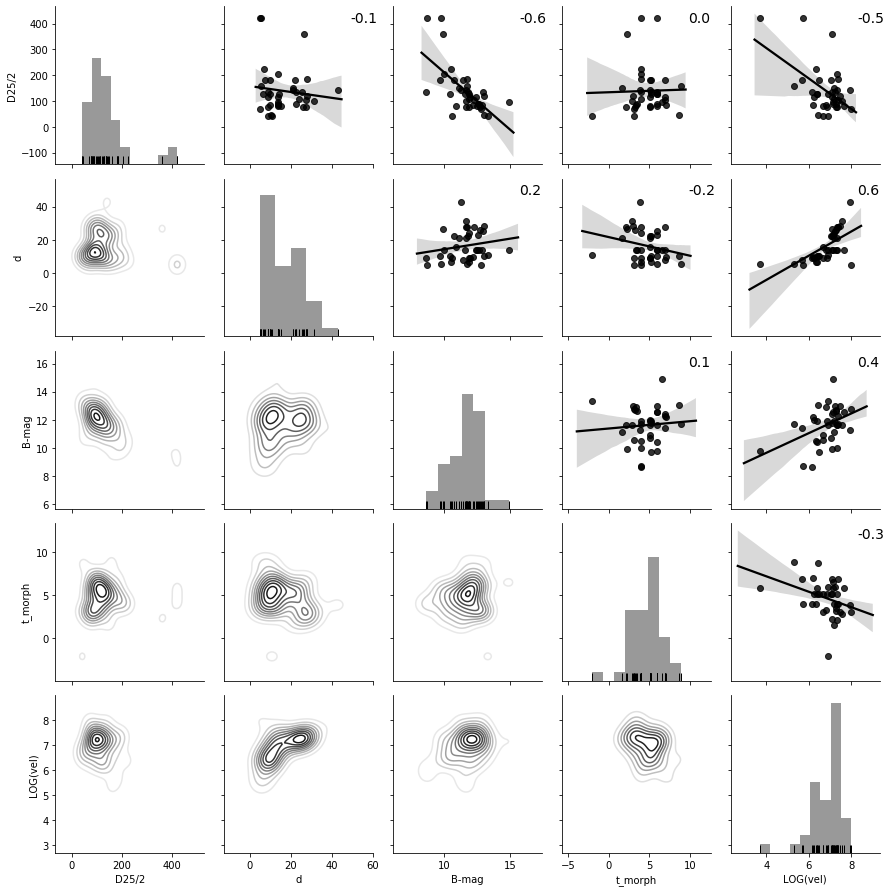

In [18]:
grid = sns.PairGrid(data=df, vars=['D25/2', 'd', 'B-mag', 't_morph', 'LOG(vel)'], dropna=True)
grid = grid.map_upper(sns.regplot, color='black')
grid = grid.map_upper(corrfunc)
grid = grid.map_lower(sns.kdeplot, cmap='binary')
grid = grid.map_diag(sns.distplot, kde=False, rug=True, color='black')
plt.tight_layout()
plt.savefig('test.png', dpi=200)